In [1]:
import pandas as pd
import numpy as np
import pysubgroup as ps
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 0. Importer le jeu de donnees

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(5)

,restaurant_name,review_number,overallRating,wifi,livraison,lat,lng,district,Française,Européenne,...,Belge,Roumaine,Tunisienne,Suisse,Albanaise,Canadienne,Amérique centrale,Arabe,Vénézuélienne,Chilienne
0,le Neuvième Art,626.0,5.0,1.0,1.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Aromatic,601.0,5.0,1.0,0.0,45.774387,4.830961,69004 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Le Boeuf d'Argent,482.0,4.5,0.0,0.0,45.762661,4.826900,69005 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Le Comptoir des Cousins,205.0,5.0,1.0,0.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
4,L'Archange,946.0,4.5,0.0,0.0,45.768459,4.827991,69001 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0


# 1. Clustering avec `review_number`, `overallRating`, `wifi` et `livraison`

## 1.1. Extraire les colonnes necessaires

In [3]:
df1 = df[df.columns[:4]]
df1.dtypes

restaurant_name     object
review_number      float64
overallRating      float64
wifi               float64
dtype: object

## 1.2. Extraire et normaliser le training set 

In [4]:
X = df1.values[:, 1:]
Xss = StandardScaler().fit_transform(X)

## 1.3. Appliquer K-means avec k entre 2 et 20 pour trouver la meilleure valeur k

In [5]:
scores = []
max_k = 20
for i in range(2, max_k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Xss)
    sc = kmeans.inertia_
    scores.append(sc)
    print('k = {0}, SSE = {1:.4f}'.format(i, sc))

k = 2, SSE = 3454.5131
k = 3, SSE = 2397.9363
k = 4, SSE = 1431.6823
k = 5, SSE = 1159.8584
k = 6, SSE = 975.4295
k = 7, SSE = 825.9201
k = 8, SSE = 725.0197
k = 9, SSE = 644.3009
k = 10, SSE = 564.1973
k = 11, SSE = 515.2932
k = 12, SSE = 471.9180
k = 13, SSE = 421.0376
k = 14, SSE = 389.1855
k = 15, SSE = 349.8451
k = 16, SSE = 317.9933
k = 17, SSE = 292.8907
k = 18, SSE = 272.4156
k = 19, SSE = 255.9120


## 1.4. Appliquer le methode "coude" pour choisir la valeur `k`

([<matplotlib.axis.XTick at 0x7f9c308e7350>,
 <a list of 18 Text xticklabel objects>)

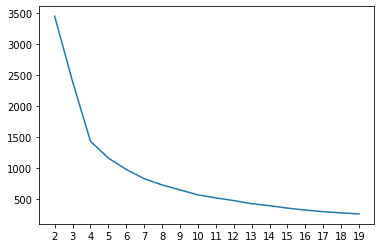

In [6]:
plt.plot(range(2, max_k), scores)
plt.xticks(range(2, max_k))

## 1.5. Appliquer K-means avec k=6

In [7]:
k = 6

In [8]:
clusters = KMeans(n_clusters=k, random_state=0).fit_predict(Xss)
clusters

array([3, 3, 2, ..., 3, 5, 5], dtype=int32)

## 1.6. Ajouter la colonne `cluster` contenant le cluster de chaque ligne

In [9]:
df['cluster'] = clusters
df

,restaurant_name,review_number,overallRating,wifi,livraison,lat,lng,district,Française,Européenne,...,Roumaine,Tunisienne,Suisse,Albanaise,Canadienne,Amérique centrale,Arabe,Vénézuélienne,Chilienne,cluster
0,le Neuvième Art,626.0,5.0,1.0,1.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,3
1,Aromatic,601.0,5.0,1.0,0.0,45.774387,4.830961,69004 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,3
2,Le Boeuf d'Argent,482.0,4.5,0.0,0.0,45.762661,4.826900,69005 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,2
3,Le Comptoir des Cousins,205.0,5.0,1.0,0.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,1
4,L'Archange,946.0,4.5,0.0,0.0,45.768459,4.827991,69001 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Le pop rock,49.0,1.5,0.0,0.0,45.750340,4.826126,69002 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,5
1743,Burger King,45.0,1.5,0.0,0.0,45.712090,4.967150,69800 Saint-Priest Lyon,0,0,...,0,0,0,0,0,0,0,0,0,5
1744,Les Chandelles,861.0,2.0,0.0,0.0,45.763374,4.827272,69005 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,3
1745,La Carretta,47.0,1.5,0.0,0.0,45.765694,4.827927,69005 Lyon,0,0,...,0,0,0,0,0,0,0,0,0,5


## 1.7. Visualiser les clusters

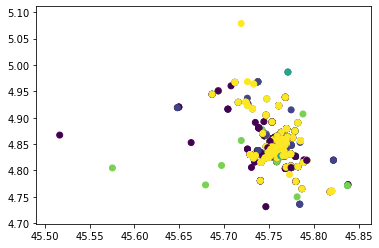

In [10]:
plt.scatter(df['lat'], df['lng'], c=df['cluster'])

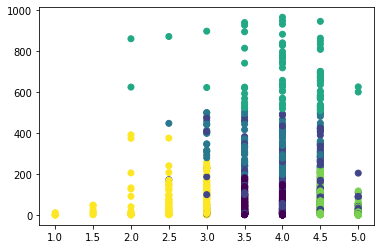

In [11]:
plt.scatter(df['overallRating'], df['review_number'], c=df['cluster'])

# 2. Clustering par le type des restaurants

## 2.1. Extraire les colonnes necessaires

In [12]:
# df2 = df.drop(['lat', 'lng', 'district'], axis=1)
df2 = df.drop(['overallRating', 'review_number', 'wifi', 'livraison', 'lat', 'lng', 'district'], axis=1)
df2.shape

(1747, 80)

## 2.2. Extraire, normaliser le training set et reduire ses dimensions

In [13]:
X = df2.values[:, 1:]
Xss = StandardScaler().fit_transform(X)
Xpca = PCA(n_components=8).fit_transform(Xss)

In [14]:
Xpca.shape

(1747, 8)

## 2.3. Trouver la valeur k

In [15]:
scores = []
max_k = 20
for i in range(2, max_k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Xpca)
    sc = kmeans.inertia_
    scores.append(sc)
    print('k = {0}, SSE = {1:.4f}'.format(i, sc))

k = 2, SSE = 25588.7994
k = 3, SSE = 22264.9606
k = 4, SSE = 18961.2025
k = 5, SSE = 15908.1880
k = 6, SSE = 13238.7719
k = 7, SSE = 10782.9895
k = 8, SSE = 8366.4620
k = 9, SSE = 5873.5290
k = 10, SSE = 4729.3085
k = 11, SSE = 4002.9145
k = 12, SSE = 3174.1064
k = 13, SSE = 2853.4136
k = 14, SSE = 2632.6691
k = 15, SSE = 2366.1706
k = 16, SSE = 2160.1597
k = 17, SSE = 2035.2407
k = 18, SSE = 1901.0780
k = 19, SSE = 1672.6818


([<matplotlib.axis.XTick at 0x7f9c2fa53b50>,
 <a list of 18 Text xticklabel objects>)

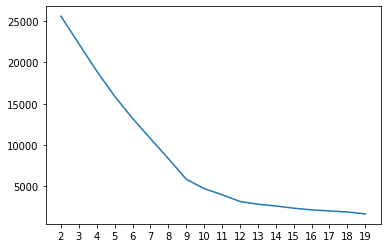

In [16]:
plt.plot(range(2, max_k), scores)
plt.xticks(range(2, max_k))

In [17]:
k = 11

## 2.4. Appliquer K-means avec k=11

In [18]:
clusters = KMeans(n_clusters=k, random_state=0).fit_predict(Xpca)
clusters

array([ 0,  0,  0, ...,  0, 10, 10], dtype=int32)

In [19]:
df['cluster'] = clusters
df

,restaurant_name,review_number,overallRating,wifi,livraison,lat,lng,district,Française,Européenne,...,Roumaine,Tunisienne,Suisse,Albanaise,Canadienne,Amérique centrale,Arabe,Vénézuélienne,Chilienne,cluster
0,le Neuvième Art,626.0,5.0,1.0,1.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Aromatic,601.0,5.0,1.0,0.0,45.774387,4.830961,69004 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Le Boeuf d'Argent,482.0,4.5,0.0,0.0,45.762661,4.826900,69005 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Le Comptoir des Cousins,205.0,5.0,1.0,0.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,9
4,L'Archange,946.0,4.5,0.0,0.0,45.768459,4.827991,69001 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Le pop rock,49.0,1.5,0.0,0.0,45.750340,4.826126,69002 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,0
1743,Burger King,45.0,1.5,0.0,0.0,45.712090,4.967150,69800 Saint-Priest Lyon,0,0,...,0,0,0,0,0,0,0,0,0,0
1744,Les Chandelles,861.0,2.0,0.0,0.0,45.763374,4.827272,69005 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,0
1745,La Carretta,47.0,1.5,0.0,0.0,45.765694,4.827927,69005 Lyon,0,0,...,0,0,0,0,0,0,0,0,0,10


## 2.5. Visualiser le resultat de clustering

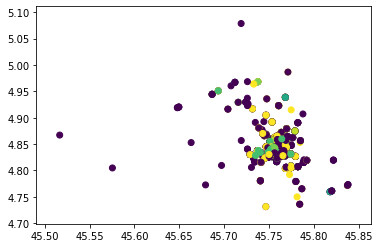

In [20]:
plt.scatter(df['lat'], df['lng'], c=df['cluster'].values)

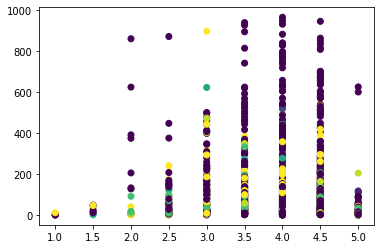

In [21]:
plt.scatter(df['overallRating'], df['review_number'], c=df['cluster'])

# 3. Clustering par tous les attributs possibles

## 3.1. Extraire les colonnes necessaires

In [22]:
df3 = df.drop(['lat', 'lng', 'district'], axis=1)
df3.shape

(1747, 84)

## 3.2. Extraire, normaliser le training set et reduire ses dimensions

In [23]:
X = df3.values[:, 1:]
Xss = StandardScaler().fit_transform(X)
Xpca = PCA(n_components=10).fit_transform(Xss)

## 3.3. Trouver la valeur k

In [24]:
scores = []
max_k = 20
for i in range(2, max_k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Xpca)
    sc = kmeans.inertia_
    scores.append(sc)
    print('k = {0}, SSE = {1:.4f}'.format(i, sc))

k = 2, SSE = 32475.4305
k = 3, SSE = 29284.8735
k = 4, SSE = 26077.9031
k = 5, SSE = 22793.2161
k = 6, SSE = 20021.6880
k = 7, SSE = 16945.9682
k = 8, SSE = 13965.1402
k = 9, SSE = 11218.7415
k = 10, SSE = 8551.7460
k = 11, SSE = 6317.2481
k = 12, SSE = 5491.3941
k = 13, SSE = 5015.4621
k = 14, SSE = 4524.7263
k = 15, SSE = 4170.8975
k = 16, SSE = 3942.5995
k = 17, SSE = 3749.5590
k = 18, SSE = 3455.5915
k = 19, SSE = 3281.2504


([<matplotlib.axis.XTick at 0x7f9c2ece7f90>,
 <a list of 18 Text xticklabel objects>)

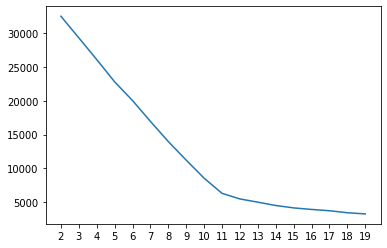

In [25]:
plt.plot(range(2, max_k), scores)
plt.xticks(range(2, max_k))

## 3.4. Appliquer K-means avec k=11

In [26]:
k = 11

In [27]:
clusters = KMeans(n_clusters=k, random_state=0).fit_predict(Xpca)
clusters

array([10, 10, 10, ..., 10,  0,  0], dtype=int32)

In [28]:
df['cluster'] = clusters
df

,restaurant_name,review_number,overallRating,wifi,livraison,lat,lng,district,Française,Européenne,...,Roumaine,Tunisienne,Suisse,Albanaise,Canadienne,Amérique centrale,Arabe,Vénézuélienne,Chilienne,cluster
0,le Neuvième Art,626.0,5.0,1.0,1.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,10
1,Aromatic,601.0,5.0,1.0,0.0,45.774387,4.830961,69004 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,10
2,Le Boeuf d'Argent,482.0,4.5,0.0,0.0,45.762661,4.826900,69005 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,10
3,Le Comptoir des Cousins,205.0,5.0,1.0,0.0,45.768494,4.856464,69006 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,6
4,L'Archange,946.0,4.5,0.0,0.0,45.768459,4.827991,69001 Lyon,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Le pop rock,49.0,1.5,0.0,0.0,45.750340,4.826126,69002 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,10
1743,Burger King,45.0,1.5,0.0,0.0,45.712090,4.967150,69800 Saint-Priest Lyon,0,0,...,0,0,0,0,0,0,0,0,0,10
1744,Les Chandelles,861.0,2.0,0.0,0.0,45.763374,4.827272,69005 Lyon,1,0,...,0,0,0,0,0,0,0,0,0,10
1745,La Carretta,47.0,1.5,0.0,0.0,45.765694,4.827927,69005 Lyon,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.5. Visualiser le resultat de clustering

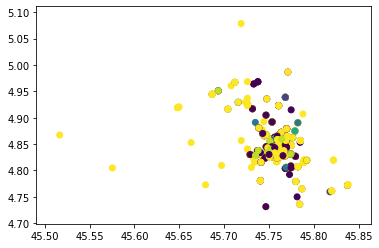

In [29]:
plt.scatter(df['lat'], df['lng'], c=df['cluster'].values)

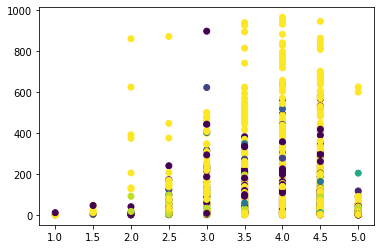

In [30]:
plt.scatter(df['overallRating'], df['review_number'], c=df['cluster'])